In [1]:
import math, re, urllib, requests
import pandas as pd
import numpy as np

# To create deep learning models
import tensorflow as tf
from tensorflow import keras
from keras.layers import Input, Embedding, Reshape, Dot, Concatenate, Dense, Dropout
from keras.models import Model
from keras.utils.vis_utils import plot_model

# To stack sparse matrices
from scipy.sparse import vstack
# For visulazation
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error

In [2]:
resp = pd.read_csv('Leh_responses.csv')

In [3]:
resp.shape

(104, 17)

In [4]:
resp.head(2)

,Timestamp,Age,Gender,Marital Status,Which category best describes your primary area of employment?,In which city do you live?,How many night(s) do you plan to stay in Leh?,The people who will be accompanying you:,Estimated budget for the trip (per person)?,The purpose of taking the trip,Which type of accommodation would you prefer for the trip?,What are the activities you have planned to participate in during your stay?,Please tick the places that you have visited/ planning to visit during your trip to Leh.,Food and beverages(restaurant),Accessibility to public transport,Hotel facilities,Price of goods and services
0,27/08/2020 17:12:32,21,Female,Unmarried,Student,Bhopal,More than 5 days,Parents or Relatives,Between 10k and 25k,Holiday or vacation,Hotel,"Visit museums, Visit national parks, Visit his...","Pangong Tso Lake, Shanti Stupa, Tiger Hill, Kh...",9.0,8.0,10.0,8.0
1,27/08/2020 17:14:42,22,Male,Unmarried,Student,Deoria,Less than 2 days,Friends,Below 10k,Holiday or vacation,Dormitory,"Biking, Water Sports or Boating, Visit enterta...","Pangong Tso Lake, Shanti Stupa, Royal Leh Pala...",9.0,6.0,7.0,7.0


In [5]:
resp.drop(['Timestamp','Marital Status','Which category best describes your primary area of employment?','In which city do you live?','The people who will be accompanying you:',], axis=1,inplace = True)


In [6]:
resp.rename(columns={
    'How many night(s) do you plan to stay in Leh?':'Nights_Stay',
    'Estimated budget for the trip (per person)?':'Est_Budget',
    'The purpose of taking the trip':'Purpose',
    'Which type of accommodation would you prefer for the trip?':'Accommodation_Type',
    'What are the activities you have planned to participate in during your stay?':'Activities',
    'Please tick the places that you have visited/ planning to visit during your trip to Leh.': 'Places_to_Visit'},
inplace=True)
resp.shape

(104, 12)

In [7]:
resp.head(2)

,Age,Gender,Nights_Stay,Est_Budget,Purpose,Accommodation_Type,Activities,Places_to_Visit,Food and beverages(restaurant),Accessibility to public transport,Hotel facilities,Price of goods and services
0,21,Female,More than 5 days,Between 10k and 25k,Holiday or vacation,Hotel,"Visit museums, Visit national parks, Visit his...","Pangong Tso Lake, Shanti Stupa, Tiger Hill, Kh...",9.0,8.0,10.0,8.0
1,22,Male,Less than 2 days,Below 10k,Holiday or vacation,Dormitory,"Biking, Water Sports or Boating, Visit enterta...","Pangong Tso Lake, Shanti Stupa, Royal Leh Pala...",9.0,6.0,7.0,7.0


In [8]:
resp.isnull().sum()

Age                                   0
Gender                                0
Nights_Stay                           0
Est_Budget                            0
Purpose                               0
Accommodation_Type                    0
Activities                            0
Places_to_Visit                      11
Food and beverages(restaurant)       78
Accessibility to public transport    78
Hotel facilities                     78
Price of goods and services          78
dtype: int64

In [9]:
resp['Places_to_Visit'].fillna('None',inplace=True)

In [10]:
resp.isnull().sum()

Age                                   0
Gender                                0
Nights_Stay                           0
Est_Budget                            0
Purpose                               0
Accommodation_Type                    0
Activities                            0
Places_to_Visit                       0
Food and beverages(restaurant)       78
Accessibility to public transport    78
Hotel facilities                     78
Price of goods and services          78
dtype: int64

In [11]:
resp.head(5)

,Age,Gender,Nights_Stay,Est_Budget,Purpose,Accommodation_Type,Activities,Places_to_Visit,Food and beverages(restaurant),Accessibility to public transport,Hotel facilities,Price of goods and services
0,21,Female,More than 5 days,Between 10k and 25k,Holiday or vacation,Hotel,"Visit museums, Visit national parks, Visit his...","Pangong Tso Lake, Shanti Stupa, Tiger Hill, Kh...",9.0,8.0,10.0,8.0
1,22,Male,Less than 2 days,Below 10k,Holiday or vacation,Dormitory,"Biking, Water Sports or Boating, Visit enterta...","Pangong Tso Lake, Shanti Stupa, Royal Leh Pala...",9.0,6.0,7.0,7.0
2,21,Female,Between 2 to 5 days,Below 10k,Holiday or vacation,Dormitory,"Biking, Water Sports or Boating, Visit museums...","Pangong Tso Lake, Shanti Stupa, Tiger Hill, Kh...",NaN,NaN,NaN,NaN
3,22,Male,Between 2 to 5 days,Between 10k and 25k,Holiday or vacation,Hotel,"Visit entertainment places, nightclubs, Restau...","Pangong Tso Lake, Gol Market",9.0,9.0,7.0,10.0
4,20,Female,More than 5 days,Above 25k,Holiday or vacation,Hotel,"Biking, Water Sports or Boating, Visit museums...","Pangong Tso Lake, Shanti Stupa, Tiger Hill, Kh...",NaN,NaN,NaN,NaN


In [12]:
resp['Food and beverages(restaurant)'].fillna(resp['Food and beverages(restaurant)'].mean(), inplace=True)
resp['Accessibility to public transport'].fillna(resp['Accessibility to public transport'].mean(), inplace=True)
resp['Hotel facilities'].fillna(resp['Hotel facilities'].mean(), inplace=True)
resp['Price of goods and services'].fillna(resp['Price of goods and services'].mean(), inplace=True)

In [13]:
resp.head(2)

,Age,Gender,Nights_Stay,Est_Budget,Purpose,Accommodation_Type,Activities,Places_to_Visit,Food and beverages(restaurant),Accessibility to public transport,Hotel facilities,Price of goods and services
0,21,Female,More than 5 days,Between 10k and 25k,Holiday or vacation,Hotel,"Visit museums, Visit national parks, Visit his...","Pangong Tso Lake, Shanti Stupa, Tiger Hill, Kh...",9.0,8.0,10.0,8.0
1,22,Male,Less than 2 days,Below 10k,Holiday or vacation,Dormitory,"Biking, Water Sports or Boating, Visit enterta...","Pangong Tso Lake, Shanti Stupa, Royal Leh Pala...",9.0,6.0,7.0,7.0


In [14]:
item = []
for i in range(len(resp['Age'])):
    item.append(i+1)

In [15]:
resp['UserId'] = item
resp.head(2)

,Age,Gender,Nights_Stay,Est_Budget,Purpose,Accommodation_Type,Activities,Places_to_Visit,Food and beverages(restaurant),Accessibility to public transport,Hotel facilities,Price of goods and services,UserId
0,21,Female,More than 5 days,Between 10k and 25k,Holiday or vacation,Hotel,"Visit museums, Visit national parks, Visit his...","Pangong Tso Lake, Shanti Stupa, Tiger Hill, Kh...",9.0,8.0,10.0,8.0,1
1,22,Male,Less than 2 days,Below 10k,Holiday or vacation,Dormitory,"Biking, Water Sports or Boating, Visit enterta...","Pangong Tso Lake, Shanti Stupa, Royal Leh Pala...",9.0,6.0,7.0,7.0,2


In [16]:
resp.shape

(104, 13)

In [17]:
resp = resp.assign(Places_to_Visit=resp.Places_to_Visit.str.split(",")).explode('Places_to_Visit')


In [18]:
resp_df = pd.DataFrame(resp,columns = ['UserId','Places_to_Visit'])

In [19]:
resp_df

,UserId,Places_to_Visit
0,1,Pangong Tso Lake
0,1,Shanti Stupa
0,1,Tiger Hill
0,1,Khardung-la Pass
0,1,Royal Leh Palace
...,...,...
103,104,Nubra Valley
103,104,Hemis National Park
103,104,Alchi
103,104,Chadar Trek


In [20]:
Rating = []
for i in range(len(resp_df)):
    Rating.append(5)

In [21]:
resp_df['Rating'] = Rating

In [22]:
resp_df.reset_index(inplace = True, drop = True)

In [23]:
resp_df

,UserId,Places_to_Visit,Rating
0,1,Pangong Tso Lake,5
1,1,Shanti Stupa,5
2,1,Tiger Hill,5
3,1,Khardung-la Pass,5
4,1,Royal Leh Palace,5
...,...,...,...
1080,104,Nubra Valley,5
1081,104,Hemis National Park,5
1082,104,Alchi,5
1083,104,Chadar Trek,5


In [24]:
resp_df.shape

(1085, 3)

In [25]:
user_attr = pd.read_csv('user_attr.csv')
user_attr.head(2)

,Name,Description,Category
0,Pangong Tso Lake,"""The best way to visit this place is to stay o...",Nature & Parks
1,Shanti Stupa,"""It’s atop a hill and it’s very serene - a mus...",Sights & Landmarks


In [26]:
user_attr = user_attr.assign(Id=(user_attr['Name']).astype('category').cat.codes)

In [27]:
user_attr.head()

,Name,Description,Category,Id
0,Pangong Tso Lake,"""The best way to visit this place is to stay o...",Nature & Parks,14
1,Shanti Stupa,"""It’s atop a hill and it’s very serene - a mus...",Sights & Landmarks,17
2,Tiger Hill,NaN,Nature & Parks,19
3,Khardung-la Pass,NaN,Nature & Parks,10
4,Royal Leh Palace,"""... the colourfully muralled Chandazik Gompa ...",Sights & Landmarks,15


In [28]:
user_attr.drop(['Description','Category'],axis=1)

,Name,Id
0,Pangong Tso Lake,14
1,Shanti Stupa,17
2,Tiger Hill,19
3,Khardung-la Pass,10
4,Royal Leh Palace,15
5,Gol Market,5
6,Gurudwara Pathar Sahib,6
7,Hall of Fame,7
8,Thiksey monastery,18
9,Sand dunes Leisure Park,16


In [29]:
def remove(string):
    return string.replace(" ","")

In [30]:
Item = []
x = resp_df.shape[0]
print(x)
y = user_attr.shape[0]
print(y)
for i in range(x):
    c=0
    for j in range(y):
#         print(resp_df['Places_to_Visit'][i])
#         print(user_attr['Name'][j])
        if remove(resp_df['Places_to_Visit'][i])==remove(user_attr['Name'][j]):
            Item.append(user_attr['Id'][j])
            c=1
            break
        elif j==y-1 and remove(resp_df['Places_to_Visit'][i])!=remove(user_attr['Name'][j]) and c==0:
              Item.append(-1)
    
            
len(Item)

1085
20


1085

In [31]:
resp_df['ItemId'] = Item

In [32]:
resp_df.head(5)

,UserId,Places_to_Visit,Rating,ItemId
0,1,Pangong Tso Lake,5,14
1,1,Shanti Stupa,5,17
2,1,Tiger Hill,5,19
3,1,Khardung-la Pass,5,10
4,1,Royal Leh Palace,5,15


In [33]:
resp_df.drop(['Places_to_Visit'],axis=1)

,UserId,Rating,ItemId
0,1,5,14
1,1,5,17
2,1,5,19
3,1,5,10
4,1,5,15
...,...,...,...
1080,104,5,12
1081,104,5,8
1082,104,5,0
1083,104,5,2


In [34]:
df_p = resp_df.pivot_table(index='UserId', columns='ItemId', values='Rating')
df_p.sample(6)

ItemId,-1,0,1,2,3,4,5,6,7,8,...,10,11,12,13,14,15,16,17,18,19
UserId,,,,,,,,,,,,,,,,,,,,,
37,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,5.0,NaN,NaN,NaN,5.0,NaN,5.0,5.0,5.0,5.0
85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,...,NaN,NaN,NaN,NaN,5.0,NaN,NaN,5.0,NaN,5.0
97,NaN,NaN,NaN,5.0,NaN,NaN,5.0,NaN,NaN,NaN,...,5.0,5.0,5.0,NaN,5.0,5.0,NaN,5.0,NaN,5.0
2,NaN,5.0,NaN,5.0,NaN,5.0,NaN,NaN,5.0,NaN,...,NaN,NaN,NaN,NaN,5.0,5.0,NaN,5.0,5.0,NaN
46,NaN,NaN,NaN,5.0,NaN,NaN,5.0,NaN,5.0,5.0,...,5.0,5.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,5.0


In [43]:
df = resp_df
#create mappings
user_ids = df["UserId"].unique().tolist()
user2user_encoded = {x: i for i, x in enumerate(user_ids)}
userencoded2user = {i: x for i, x in enumerate(user_ids)}

place_ids = df["ItemId"].unique().tolist()
place2place_encoded = {x: i for i, x in enumerate(place_ids)}
place_encoded2place = {i: x for i, x in enumerate(place_ids)}
df["user"] = df["UserId"].map(user2user_encoded)
df["Place"] = df["ItemId"].map(place2place_encoded)
num_users = len(user2user_encoded)
num_place = len(place_encoded2place)

df = df.sample(frac=1, random_state=42)
x = df[["user", "Place"]].values
# Normalize the targets between 0 and 1.
#y = df["Rating"].values
y = df["Rating"].apply(lambda x: (x - 0.5) / (4.5)).values

# Prepare training, validation and testing data 
# training on 90% of the data, validating on 10% and testing on 1000 seperate samples.
train_indices = int(0.9 * df.shape[0])

x_train, x_val, x_test, y_train, y_val, y_test = (
    x[:train_indices],
    x[train_indices:1000],
    x[1000:],
    y[:train_indices],
    y[train_indices:1000],
    y[1000:],
)



In [50]:
#embed both users and places in to 50-dimensional vectors
embedding_size= 50 

# Create model
# Set input layers
user_id_input = Input(shape=[1], name='user')
place_id_input = Input(shape=[1], name='place')

# Create embedding layers for users and places
user_embedding = Embedding(output_dim=embedding_size, 
                           input_dim=num_users,
                           input_length=1, 
                           embeddings_initializer="he_normal",
                           embeddings_regularizer=keras.regularizers.l2(1e-6),
                           name='user_embedding')(user_id_input)
place_embedding = Embedding(output_dim=embedding_size, 
                            input_dim=num_place,
                            input_length=1, 
                            embeddings_initializer="he_normal",
                            embeddings_regularizer=keras.regularizers.l2(1e-6),
                            name='place_embedding')(place_id_input)

# Reshape the embedding layers
user_vector = Reshape([embedding_size])(user_embedding)
place_vector = Reshape([embedding_size])(place_embedding)

# Concatenate the reshaped embedding layers
concat = Concatenate()([user_vector, place_vector])
#concat = Dot(1, normalize=False)([user_vector, place_vector])

# Combine with dense layers
dense1 = Dense(256)(concat)
dense = Dropout(0.2)(dense1)
y = Dense(1, activation="sigmoid")(dense) # The sigmoid activation forces the Rating to between 0 and 1


# compile model
model = Model(inputs=[user_id_input, place_id_input], outputs=y)
model.compile(loss='mse',  optimizer = 'adam')
 

# Fit the model
history = model.fit(x = [x_train[:,0],x_train[:,1]],
          y = y_train,
          batch_size=256, 
          epochs=4,
          validation_data = ([x_val[:,0], x_val[:,1]], y_val),
          )

Epoch 1/4


/home/ankita123/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


4/4 [==============================] - 0s 45ms/step - loss: 0.2246 - val_loss: 0.1707
Epoch 2/4
4/4 [==============================] - 0s 8ms/step - loss: 0.1412 - val_loss: 0.0978
Epoch 3/4
4/4 [==============================] - 0s 8ms/step - loss: 0.0851 - val_loss: 0.0520
Epoch 4/4
4/4 [==============================] - 0s 9ms/step - loss: 0.0491 - val_loss: 0.0259


In [51]:
model.summary()

Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
user (InputLayer)               [(None, 1)]          0                                            
__________________________________________________________________________________________________
place (InputLayer)              [(None, 1)]          0                                            
__________________________________________________________________________________________________
user_embedding (Embedding)      (None, 1, 50)        5200        user[0][0]                       
__________________________________________________________________________________________________
place_embedding (Embedding)     (None, 1, 50)        1050        place[0][0]                      
_______________________________________________________________________________________

In [52]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


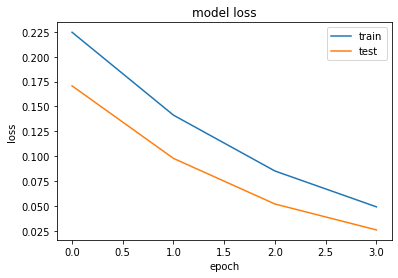

In [53]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper right")
plt.show()

In [54]:
#  Compute RMSE
y_pred = model.predict([x_test[:,0], x_test[:,1]])
y_true =  y_test

rmse = np.sqrt(mean_squared_error(y_pred=y_pred, y_true=y_true))
print('\n\nTesting Result : {:.4f} RMSE'.format(rmse))



Testing Result : 0.1750 RMSE


In [55]:
# Test model
p , a = (model.predict([x_test[:15,0], x_test[:15,1]]) , y_test[:15])
print("Ratings are Normalized between 0 and 1 (0.5 - 5.0)")
for i in range(len(p)):
    print("predicted Rating is : "+ str(np.round(p[i],2)) +"        actual Rating was : "+ str(round(a[i],2)) )

ratings are Normalized between 0 and 1 (0.5 - 5.0)
predicted rating is : [0.69]        actual rating was : 1.0
predicted rating is : [0.92]        actual rating was : 1.0
predicted rating is : [0.89]        actual rating was : 1.0
predicted rating is : [0.88]        actual rating was : 1.0
predicted rating is : [0.83]        actual rating was : 1.0
predicted rating is : [0.73]        actual rating was : 1.0
predicted rating is : [0.76]        actual rating was : 1.0
predicted rating is : [0.83]        actual rating was : 1.0
predicted rating is : [0.66]        actual rating was : 1.0
predicted rating is : [0.9]        actual rating was : 1.0
predicted rating is : [0.79]        actual rating was : 1.0
predicted rating is : [0.91]        actual rating was : 1.0
predicted rating is : [0.86]        actual rating was : 1.0
predicted rating is : [0.78]        actual rating was : 1.0
predicted rating is : [0.88]        actual rating was : 1.0


In [66]:
# display recommendations
def get_recomendations(user_id):
      places_watched_by_user = df[df.UserId == user_id]
      places_not_watched = user_attr[
          ~user_attr["Id"].isin(places_watched_by_user.ItemId.values)]["Id"]
      places_not_watched = list(
          set(places_not_watched).intersection(set(place2place_encoded.keys()))
      )
      places_not_watched = [[place2place_encoded.get(x)] for x in places_not_watched]
      user_encoder = user2user_encoded.get(user_id)
      user_place_array = np.hstack(
          ([[user_id]] * len(places_not_watched), places_not_watched)
      )

      Ratings = model.predict([user_place_array[:,0], user_place_array[:,1]]).flatten()

      top_Ratings_indices = Ratings.argsort()[-10:][::-1]
      recommended_place_ids = [
          place_encoded2place.get(places_not_watched[x][0]) for x in top_Ratings_indices
      ]

      print("Showing recommendations for user: {}".format(user_id))
      print("=" * 36)
      print("places with high Ratings from user")
      print("-" * 34)
      top_places_user = (
          places_watched_by_user.sort_values(by="Rating", ascending=False)
          .head(5)
          .ItemId.values
      )
      user_attr_rows = user_attr[user_attr["Id"].isin(top_places_user)]
      for row in user_attr_rows.itertuples():
          print(row.Name)

      print("-" * 30)
      print(" Top 10 place recommendations")
      print("-" * 30)
      recommended_places = user_attr[user_attr["Id"].isin(recommended_place_ids)]
      #for row in recommended_places.itertuples():
          #print(row.Name)

In [72]:
get_recomendations(50)

Showing recommendations for user: 50
places with high Ratings from user
----------------------------------
Tiger Hill
Khardung-la Pass
Gol Market
Hall of Fame
Magnetic Hill
------------------------------
 Top 10 place recommendations
------------------------------
Diskit Monastery
Central Asian Museum
Nubra Valley
Alchi
